In [3]:
import os
import cv2 #type:ignore 
import tensorflow as tf #type:ignore 
import numpy as np #type:ignore 
from tqdm import tqdm #type:ignore 
from tensorflow.keras.models import Sequential #type:ignore 
from tensorflow.keras.layers import Flatten, Dense #type:ignore 
from tensorflow.keras.applications import DenseNet121 #type:ignore 
from sklearn.model_selection import train_test_split #type:ignore 
from sklearn import preprocessing #type:ignore 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score #type:ignore 
import matplotlib.pyplot as plt #type:ignore 
import seaborn as sns #type:ignore 


In [4]:
# Function to load and preprocess images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        return img
    else:
        return None

folders = ['blackdry grapes', 'dry dates', 'dry grapes', 'fennel', 'Grapes', 'hazelnut', 'Peanuts']
data_dir = r'D:\Indian Dry Fruit Dataset\DATASET'


X = []
y = []

In [5]:
# Load images and labels
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    for i in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, i)
        img = preprocess_image(img_path)
        if img is not None:
            X.append(img)
            y.append(folder)

X = np.array(X)
y = np.array(y)

100%|██████████| 855/855 [03:39<00:00,  3.89it/s]


In [6]:
# Encode labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Split data: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Build DenseNet121 model
def build_densenet_model():
    base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(len(folders), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [9]:
# Build DenseNet121 model
def build_densenet_model():
    base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(len(folders), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Train, evaluate, and plot
model = build_densenet_model()

In [11]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)


Epoch 1/2
119/119 ━━━━━━━━━━━━━━━━━━━━ 492s 4s/step - accuracy: 0.5226 - loss: 166.7874 - val_accuracy: 0.9731 - val_loss: 0.5424
Epoch 2/2
119/119 ━━━━━━━━━━━━━━━━━━━━ 469s 4s/step - accuracy: 0.9322 - loss: 2.0494 - val_accuracy: 0.8489 - val_loss: 6.2934


In [12]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step


In [13]:
# Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average=None)
recall = recall_score(y_test, y_pred_classes, average=None)
f1 = f1_score(y_test, y_pred_classes, average=None)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f"\nAccuracy (DenseNet121):", accuracy)
print(f"Precision (DenseNet121):", precision)
print(f"Recall (DenseNet121):", recall)
print(f"F1-score (DenseNet121):", f1)
print(f"Confusion Matrix (DenseNet121):")
print(conf_matrix)



Accuracy (DenseNet121): 0.8488924050632911
Precision (DenseNet121): [0.59475219 1.         0.92763158 1.         0.97297297 0.9962406
 0.76582278]
Recall (DenseNet121): [1.         0.96039604 0.99295775 0.32258065 0.87096774 0.76368876
 1.        ]
F1-score (DenseNet121): [0.74588665 0.97979798 0.95918367 0.48780488 0.91914894 0.86460033
 0.86738351]
Confusion Matrix (DenseNet121):
[[204   0   0   0   0   0   0]
 [  8 194   0   0   0   0   0]
 [  0   0 141   0   0   1   0]
 [ 49   0   0  40   2   0  33]
 [ 16   0   0   0 108   0   0]
 [ 66   0  11   0   1 265   4]
 [  0   0   0   0   0   0 121]]


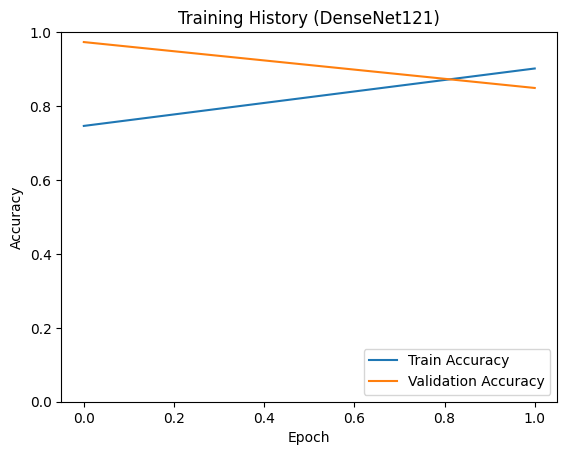

In [14]:
# Plot training history
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title("Training History (DenseNet121)")
    plt.show()

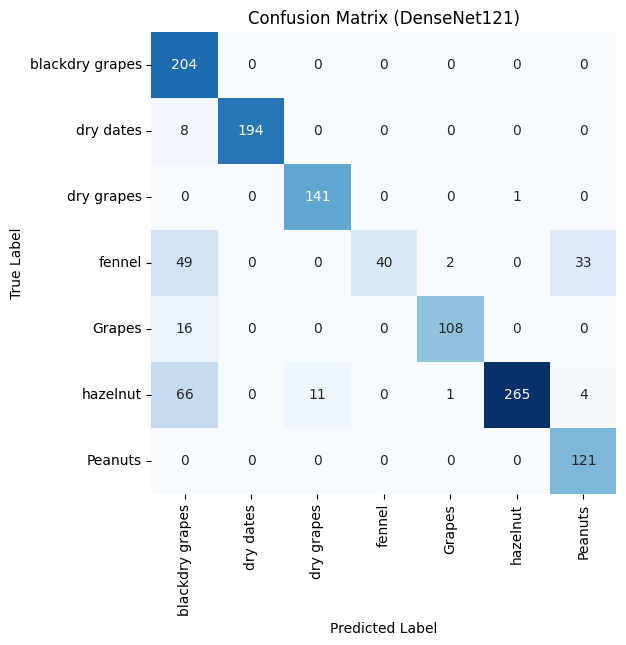

In [15]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=folders, yticklabels=folders)
plt.title('Confusion Matrix (DenseNet121)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

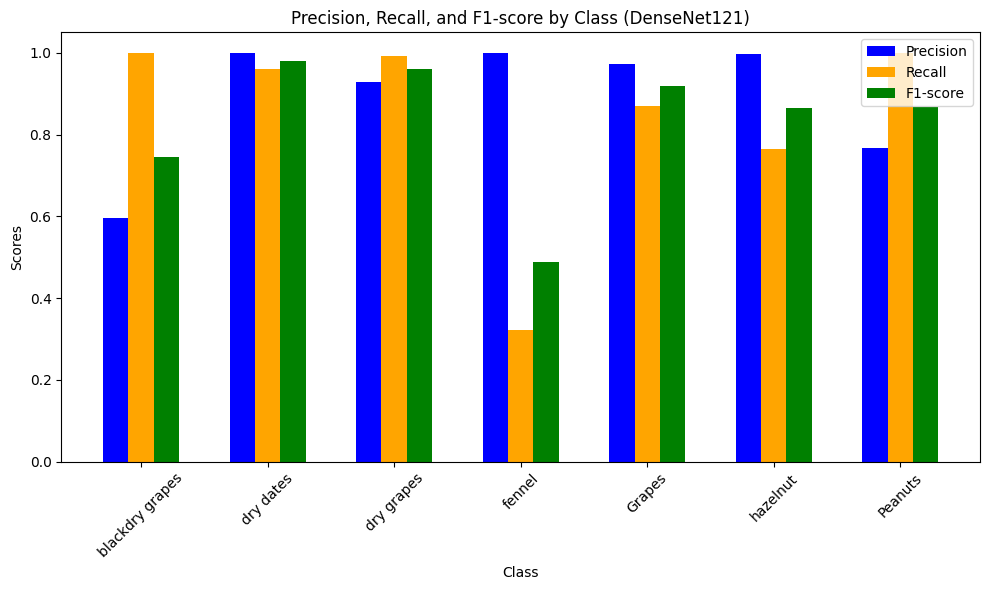

In [16]:
# Bar plot for Precision, Recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(folders))
width = 0.2

plt.bar(x - width, precision, width, label='Precision', color='blue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1, width, label='F1-score', color='green')

plt.xticks(x, folders, rotation=45)
plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score by Class (DenseNet121)')
plt.legend()
plt.tight_layout()
plt.show()
